In [189]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file1 = 'Resources/Tunde_Resources/mandates_by_county.csv'
file2 = 'Resources/Tunde_Resources/social_vulnerability_data.csv'
file3 = 'Resources/Tunde_Resources/covid_related_deaths_by_county.csv'

countydat = pd.read_csv(file1)
pci = pd.read_csv(file2)
mort = pd.read_csv(file3)

#Remove the word county from all three files for uniformity, pending when FIPS will be uniform on all 3
countydat['county'] = countydat['county'].map(lambda x: x.lstrip('+-').rstrip(' County'))
pci['COUNTY'] = pci['COUNTY'].map(lambda x: x.lstrip('+-').rstrip(' County'))
mort['County name'] = mort['County name'].map(lambda x: x.lstrip('+-').rstrip(' County'))

#preview county mandate data
countydat.head()


,state,county,maskdays,days,maskcoverage
0,AL,Autauga,267,493,0.54
1,AL,Baldwi,267,493,0.54
2,AL,Barbour,267,493,0.54
3,AL,Bibb,267,493,0.54
4,AL,Bl,267,493,0.54


In [190]:
pci.head()

,ST,STATE,ST_ABBR,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_HU,...,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP,Shape
0,19,IOWA,IA,Hancock,19081,"Hancock County, Iowa",571.004336,10888,0,5311,...,0,0,0,0,357,93,3.3,0.9,10986,MULTIPOLYGON (((-93.97129099999995 42.97916200...
1,18,INDIANA,IN,Miami,18103,"Miami County, Indiana",373.842084,35901,0,15433,...,0,0,0,0,3212,462,9.5,1.4,29430,MULTIPOLYGON (((-86.16914399999996 40.93132900...
2,20,KANSAS,KS,Stafford,20185,"Stafford County, Kansas",792.045688,4214,0,2339,...,0,0,0,0,380,78,9.3,1.9,3570,MULTIPOLYGON (((-99.02233499999994 37.89849600...
3,18,INDIANA,IN,Montgomer,18107,"Montgomery County, Indiana",504.646989,38276,0,16638,...,0,0,0,0,3573,456,9.5,1.2,35890,MULTIPOLYGON (((-87.09256299999998 40.21480600...
4,18,INDIANA,IN,Rush,18139,"Rush County, Indiana",408.123484,16704,0,7493,...,0,0,0,0,1994,490,12.1,3.0,12096,MULTIPOLYGON (((-85.63349099999994 39.78617700...


In [191]:
pci["% Poor"] = round(((pci["E_POV"] * 100) / pci["E_TOTPOP"]),2)
pci.head()

,ST,STATE,ST_ABBR,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_HU,...,F_GROUPQ,F_THEME4,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP,Shape,% Poor
0,19,IOWA,IA,Hancock,19081,"Hancock County, Iowa",571.004336,10888,0,5311,...,0,0,0,357,93,3.3,0.9,10986,MULTIPOLYGON (((-93.97129099999995 42.97916200...,7.94
1,18,INDIANA,IN,Miami,18103,"Miami County, Indiana",373.842084,35901,0,15433,...,0,0,0,3212,462,9.5,1.4,29430,MULTIPOLYGON (((-86.16914399999996 40.93132900...,15.31
2,20,KANSAS,KS,Stafford,20185,"Stafford County, Kansas",792.045688,4214,0,2339,...,0,0,0,380,78,9.3,1.9,3570,MULTIPOLYGON (((-99.02233499999994 37.89849600...,13.48
3,18,INDIANA,IN,Montgomer,18107,"Montgomery County, Indiana",504.646989,38276,0,16638,...,0,0,0,3573,456,9.5,1.2,35890,MULTIPOLYGON (((-87.09256299999998 40.21480600...,9.65
4,18,INDIANA,IN,Rush,18139,"Rush County, Indiana",408.123484,16704,0,7493,...,0,0,0,1994,490,12.1,3.0,12096,MULTIPOLYGON (((-85.63349099999994 39.78617700...,16.80


In [192]:
# Cut out just the parts we need, State, County and Per Capital Income
#State, County, Persons below poverty line, Per capital income, Total population
cleanpci = pci[["ST_ABBR", "COUNTY", "E_POV", "E_PCI", "E_TOTPOP", "% Poor"]]
cleanpci.head()


,ST_ABBR,COUNTY,E_POV,E_PCI,E_TOTPOP,% Poor
0,IA,Hancock,865,29537,10888,7.94
1,IN,Miami,5498,22871,35901,15.31
2,KS,Stafford,568,26922,4214,13.48
3,IN,Montgomer,3693,26184,38276,9.65
4,IN,Rush,2807,24900,16704,16.80


In [193]:
cleanpci = cleanpci.rename(columns={"ST_ABBR": "state"})
cleanpci = cleanpci.rename(columns={"COUNTY": "county"})
cleanpci.tail(50)

,state,county,E_POV,E_PCI,E_TOTPOP,% Poor
3092,CA,Fres,232067,23284,978130,23.73
3093,CA,Tulare,115786,20421,460477,25.14
3094,FL,Hamil,3243,15097,14269,22.73
3095,MS,Yaz,7609,18866,27974,27.20
3096,GA,Mac,3129,15924,13480,23.21
3097,GA,Quitma,517,19371,2276,22.72
3098,GA,Stewar,1478,16359,6042,24.46
3099,KY,K,4910,18201,15513,31.65
3100,MT,Roosevel,3087,18813,11228,27.49
3101,NM,Cibola,6758,18514,26978,25.05


In [194]:
mort.tail(20)

,Date as of,Start Date,End Date,State,County name,FIPS County Code,Urban Rural Code,Deaths involving COVID-19,Deaths from All Causes,Footnote
3010,10/20/2021,01/01/2020,10/16/2021,WY,Carb,56007,Noncore,17.0,213.0,NaN
3011,10/20/2021,01/01/2020,10/16/2021,WY,Converse,56009,Noncore,24.0,201.0,NaN
3012,10/20/2021,01/01/2020,10/16/2021,WY,Crook,56011,Noncore,NaN,132.0,One or more data cells have counts between 1-9...
3013,10/20/2021,01/01/2020,10/16/2021,WY,Frem,56013,Micropolitan,59.0,736.0,NaN
3014,10/20/2021,01/01/2020,10/16/2021,WY,Goshe,56015,Noncore,30.0,271.0,NaN
3015,10/20/2021,01/01/2020,10/16/2021,WY,Hot Springs,56017,Noncore,NaN,125.0,One or more data cells have counts between 1-9...
3016,10/20/2021,01/01/2020,10/16/2021,WY,Johns,56019,Noncore,13.0,166.0,NaN
3017,10/20/2021,01/01/2020,10/16/2021,WY,Laramie,56021,Small metro,202.0,1868.0,NaN
3018,10/20/2021,01/01/2020,10/16/2021,WY,Lincol,56023,Noncore,NaN,245.0,One or more data cells have counts between 1-9...
3019,10/20/2021,01/01/2020,10/16/2021,WY,Natrona,56025,Small metro,250.0,1886.0,NaN


In [195]:
cleanmort = mort[["State", "County name", "Deaths involving COVID-19"]]
cleanmort.head()

,State,County name,Deaths involving COVID-19
0,AK,Aleutians East Borough,NaN
1,AK,Anchorage Municipali,366.0
2,AK,Bethel Census Area,18.0
3,AK,Denali Borough,NaN
4,AK,Dillingham Census Area,NaN


In [196]:
cleanmort = cleanmort.rename(columns={"State": "state"})
cleanmort = cleanmort.rename(columns={"County name": "county"})
cleanmort.head()

,state,county,Deaths involving COVID-19
0,AK,Aleutians East Borough,NaN
1,AK,Anchorage Municipali,366.0
2,AK,Bethel Census Area,18.0
3,AK,Denali Borough,NaN
4,AK,Dillingham Census Area,NaN


In [197]:
#Step 1 - Using binnings technique, label counties according to depth of mask mandates
# first create an extra column as raw percentages so binning will be convenient

countydat["percent"] = countydat["maskcoverage"] * 100

countydat.head()



,state,county,maskdays,days,maskcoverage,percent
0,AL,Autauga,267,493,0.54,54.0
1,AL,Baldwi,267,493,0.54,54.0
2,AL,Barbour,267,493,0.54,54.0
3,AL,Bibb,267,493,0.54,54.0
4,AL,Bl,267,493,0.54,54.0


In [198]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 100]
group_names = ["0-10 % Masking", "10-20 % Masking", "20-30 % Masking", "30-40 % Masking", "40-50 % Masking", "50-60 % Masking", "60-70 % Masking", "70-80 % Masking", "Over 80 % Masking"]

countydat["Masking Group"] = pd.cut(countydat["percent"], bins, labels=group_names, include_lowest=True)

countydat.tail(20)




,state,county,maskdays,days,maskcoverage,percent,Masking Group
3213,PR,Rincón Municipi,490,493,0.99,99.0,Over 80 % Masking
3214,PR,Río Grande Municipi,490,493,0.99,99.0,Over 80 % Masking
3215,PR,Sabana Grande Municipi,490,493,0.99,99.0,Over 80 % Masking
3216,PR,San Germán Municipi,490,493,0.99,99.0,Over 80 % Masking
3217,PR,San Juan Municipi,490,493,0.99,99.0,Over 80 % Masking
3218,PR,San Lorenzo Municipi,490,493,0.99,99.0,Over 80 % Masking
3219,PR,San Sebastián Municipi,490,493,0.99,99.0,Over 80 % Masking
3220,PR,Santa Isabel Municipi,490,493,0.99,99.0,Over 80 % Masking
3221,PR,Toa Alta Municipi,490,493,0.99,99.0,Over 80 % Masking
3222,PR,Toa Baja Municipi,490,493,0.99,99.0,Over 80 % Masking


In [199]:
# Now begin joining the three tables

newDF = pd.merge(countydat, cleanmort, how="inner", on=["state", "county"])
newDF.head(50)

,state,county,maskdays,days,maskcoverage,percent,Masking Group,Deaths involving COVID-19
0,AL,Autauga,267,493,0.54,54.0,50-60 % Masking,122.0
1,AL,Baldwi,267,493,0.54,54.0,50-60 % Masking,473.0
2,AL,Barbour,267,493,0.54,54.0,50-60 % Masking,58.0
3,AL,Bibb,267,493,0.54,54.0,50-60 % Masking,38.0
4,AL,Bl,267,493,0.54,54.0,50-60 % Masking,63.0
5,AL,Bullock,267,493,0.54,54.0,50-60 % Masking,NaN
6,AL,Butler,267,493,0.54,54.0,50-60 % Masking,55.0
7,AL,Calh,267,493,0.54,54.0,50-60 % Masking,444.0
8,AL,Chambers,267,493,0.54,54.0,50-60 % Masking,42.0
9,AL,Cherokee,267,493,0.54,54.0,50-60 % Masking,23.0


In [200]:
newDF2 = pd.merge(newDF, cleanpci, how="inner", on=["state", "county"])
newDF2.head(50)

,state,county,maskdays,days,maskcoverage,percent,Masking Group,Deaths involving COVID-19,E_POV,E_PCI,E_TOTPOP,% Poor
0,AL,Autauga,267,493,0.54,54.0,50-60 % Masking,122.0,8422,29372,55200,15.26
1,AL,Baldwi,267,493,0.54,54.0,50-60 % Masking,473.0,21653,31203,208107,10.40
2,AL,Barbour,267,493,0.54,54.0,50-60 % Masking,58.0,6597,18461,25782,25.59
3,AL,Bibb,267,493,0.54,54.0,50-60 % Masking,38.0,2863,20199,22527,12.71
4,AL,Bl,267,493,0.54,54.0,50-60 % Masking,63.0,8220,22656,57645,14.26
5,AL,Bullock,267,493,0.54,54.0,50-60 % Masking,NaN,3110,20346,10352,30.04
6,AL,Butler,267,493,0.54,54.0,50-60 % Masking,55.0,4640,20430,20025,23.17
7,AL,Calh,267,493,0.54,54.0,50-60 % Masking,444.0,20819,24706,115098,18.09
8,AL,Chambers,267,493,0.54,54.0,50-60 % Masking,42.0,5531,22827,33826,16.35
9,AL,Cherokee,267,493,0.54,54.0,50-60 % Masking,23.0,3827,23356,25853,14.80


In [201]:
# Now we have a workable all-encompassing Data frame
# Clean off the NaNs
newDF2['Deaths involving COVID-19'] = newDF2['Deaths involving COVID-19'].fillna(0)


In [202]:
newDF2.head(50)

,state,county,maskdays,days,maskcoverage,percent,Masking Group,Deaths involving COVID-19,E_POV,E_PCI,E_TOTPOP,% Poor
0,AL,Autauga,267,493,0.54,54.0,50-60 % Masking,122.0,8422,29372,55200,15.26
1,AL,Baldwi,267,493,0.54,54.0,50-60 % Masking,473.0,21653,31203,208107,10.40
2,AL,Barbour,267,493,0.54,54.0,50-60 % Masking,58.0,6597,18461,25782,25.59
3,AL,Bibb,267,493,0.54,54.0,50-60 % Masking,38.0,2863,20199,22527,12.71
4,AL,Bl,267,493,0.54,54.0,50-60 % Masking,63.0,8220,22656,57645,14.26
5,AL,Bullock,267,493,0.54,54.0,50-60 % Masking,0.0,3110,20346,10352,30.04
6,AL,Butler,267,493,0.54,54.0,50-60 % Masking,55.0,4640,20430,20025,23.17
7,AL,Calh,267,493,0.54,54.0,50-60 % Masking,444.0,20819,24706,115098,18.09
8,AL,Chambers,267,493,0.54,54.0,50-60 % Masking,42.0,5531,22827,33826,16.35
9,AL,Cherokee,267,493,0.54,54.0,50-60 % Masking,23.0,3827,23356,25853,14.80


In [203]:
# Calculate percentage of death relative to population
newDF2["% Mort"] = round(((newDF2["Deaths involving COVID-19"] * 100) / newDF2["E_TOTPOP"]),2)
newDF2.head()

,state,county,maskdays,days,maskcoverage,percent,Masking Group,Deaths involving COVID-19,E_POV,E_PCI,E_TOTPOP,% Poor,% Mort
0,AL,Autauga,267,493,0.54,54.0,50-60 % Masking,122.0,8422,29372,55200,15.26,0.22
1,AL,Baldwi,267,493,0.54,54.0,50-60 % Masking,473.0,21653,31203,208107,10.40,0.23
2,AL,Barbour,267,493,0.54,54.0,50-60 % Masking,58.0,6597,18461,25782,25.59,0.22
3,AL,Bibb,267,493,0.54,54.0,50-60 % Masking,38.0,2863,20199,22527,12.71,0.17
4,AL,Bl,267,493,0.54,54.0,50-60 % Masking,63.0,8220,22656,57645,14.26,0.11


In [216]:
#Determine range of PCI
maxpay = newDF2["E_PCI"].max()
minpay = newDF2["E_PCI"].min()
print(f"{minpay} to {maxpay}")

-999 to 72832


In [228]:
#Finally begin plotting charts based off of Masking groups, to see incme/covid deaths trends

#["0-10 % Masking", "10-20 % Masking", "20-30 % Masking", "30-40 % Masking", "40-50 % Masking", "50-60 % Masking", 
#"60-70 % Masking", "70-80 % Masking", "Over 80 % Masking"]

mask10 = newDF2.loc[newDF2["Masking Group"] == "0-10 % Masking", ["E_PCI", "% Mort"]]
mask10to20 = newDF2.loc[newDF2["Masking Group"] == "10-20 % Masking", ["E_PCI", "% Mort"]]
mask20to30 = newDF2.loc[newDF2["Masking Group"] == "20-30 % Masking", ["E_PCI", "% Mort"]]
mask30to40 = newDF2.loc[newDF2["Masking Group"] == "30-40 % Masking", ["E_PCI", "% Mort"]]
mask40to50 = newDF2.loc[newDF2["Masking Group"] == "40-50 % Masking", ["E_PCI", "% Mort"]]
mask50to60 = newDF2.loc[newDF2["Masking Group"] == "50-60 % Masking", ["E_PCI", "% Mort"]]
mask60to70 = newDF2.loc[newDF2["Masking Group"] == "60-70 % Masking", ["E_PCI", "% Mort"]]
mask70to80 = newDF2.loc[newDF2["Masking Group"] == "70-80 % Masking", ["E_PCI", "% Mort"]]
mask80plus = newDF2.loc[newDF2["Masking Group"] == "Over 80 % Masking", ["E_PCI", "% Mort"]]



In [222]:
# Wont hurt to preview one of them before plotting
mask10.head()

,E_PCI,% Mort
67,43276,0.00
68,38423,0.00
69,14499,0.18
70,25436,0.12
71,26387,0.22


Text(0, 0.5, 'Covid 19 mortality')

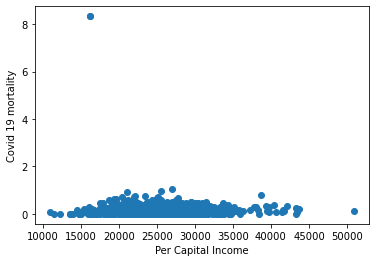

In [242]:
# Draw charts
x_axis = mask10["E_PCI"]
y_axis = mask10["% Mort"]
plt.scatter(x_axis, y_axis)
plt.xlabel("Per Capital Income")
plt.ylabel("Covid 19 mortality")

Text(0, 0.5, 'Covid 19 mortality')

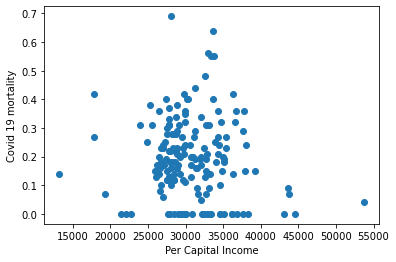

In [243]:
x_axis = mask10to20["E_PCI"]
y_axis = mask10to20["% Mort"]
plt.scatter(x_axis, y_axis)
plt.xlabel("Per Capital Income")
plt.ylabel("Covid 19 mortality")

Text(0, 0.5, 'Covid 19 mortality')

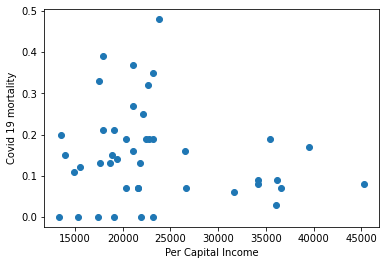

In [244]:
x_axis = mask20to30["E_PCI"]
y_axis = mask20to30["% Mort"]
plt.scatter(x_axis, y_axis)
plt.xlabel("Per Capital Income")
plt.ylabel("Covid 19 mortality")

Text(0, 0.5, 'Covid 19 mortality')

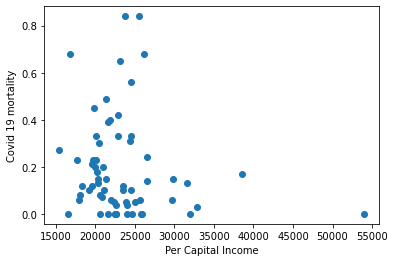

In [247]:
x_axis = mask30to40["E_PCI"]
y_axis = mask30to40["% Mort"]
plt.scatter(x_axis, y_axis)
plt.xlabel("Per Capital Income")
plt.ylabel("Covid 19 mortality")

Text(0, 0.5, 'Covid 19 mortality')

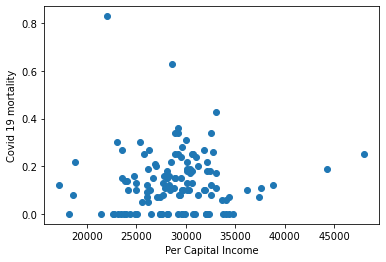

In [246]:
x_axis = mask40to50["E_PCI"]
y_axis = mask40to50["% Mort"]
plt.scatter(x_axis, y_axis)
plt.xlabel("Per Capital Income")
plt.ylabel("Covid 19 mortality")

Text(0, 0.5, 'Covid 19 mortality')

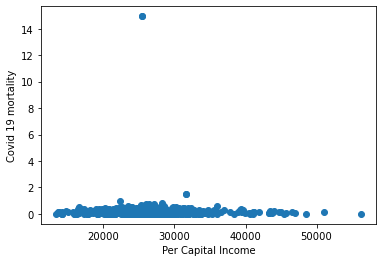

In [248]:
x_axis = mask50to60["E_PCI"]
y_axis = mask50to60["% Mort"]
plt.scatter(x_axis, y_axis)
plt.xlabel("Per Capital Income")
plt.ylabel("Covid 19 mortality")

Text(0, 0.5, 'Covid 19 mortality')

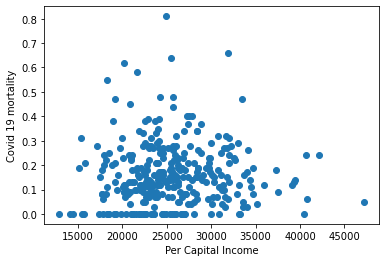

In [249]:
x_axis = mask60to70["E_PCI"]
y_axis = mask60to70["% Mort"]
plt.scatter(x_axis, y_axis)
plt.xlabel("Per Capital Income")
plt.ylabel("Covid 19 mortality")

Text(0, 0.5, 'Covid 19 mortality')

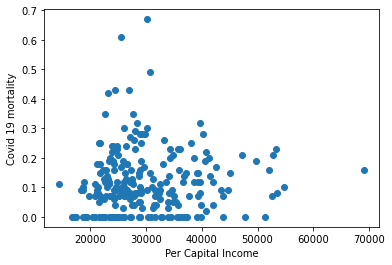

In [250]:
x_axis = mask70to80["E_PCI"]
y_axis = mask70to80["% Mort"]
plt.scatter(x_axis, y_axis)
plt.xlabel("Per Capital Income")
plt.ylabel("Covid 19 mortality")

Text(0, 0.5, 'Covid 19 mortality')

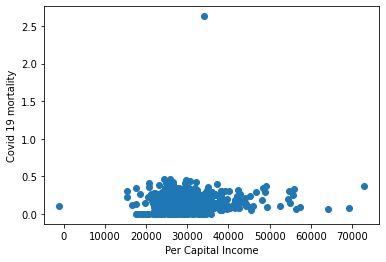

In [251]:
x_axis = mask80plus["E_PCI"]
y_axis = mask80plus["% Mort"]
plt.scatter(x_axis, y_axis)
plt.xlabel("Per Capital Income")
plt.ylabel("Covid 19 mortality")